# Cross-resonance gate time plot

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [15]:
p_set = "3"
with open('data_cr_transmon_fluxonium/fid_leak_gate_time_p_set_' + p_set + '.txt') as file_data:
    result = json.load(file_data)


In [16]:
def plot_cr_gate_time(
    result: dict,
    p_set: str,
    plot_setup={'fs': 26, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 22, 'fsl':26},
    save=False,
    dark=False
):
    if dark:
        plt.style.use('dark_background')
        color_plot = 'white'
    else:
        plt.style.use('default')
        color_plot = 'black'
        
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    gate_time_list = []
    infid_list = []
    leak_list = []
    infid_noise_list = []
    leak_noise_list = []
    for res in result:
        gate_time_list.append(res["gate_time"])
        infid_list.append(1 - res["gate_fid"])
        leak_list.append(res["avg_leakage"])
        infid_noise_list.append(1 - res["gate_fid_noise"])
        leak_noise_list.append(res["avg_leakage_noise"])
    fig, ax = plt.subplots(figsize=(8, 8))
    colors_dict = {"0": 'darkblue', '1': 'darkorange', '2':'blue'}
    ax.semilogy(gate_time_list, infid_list, linewidth=plot_setup["lw"], color=colors_dict['0'], label='$1-F_{\mathrm{gate}}$')
    ax.semilogy(gate_time_list, leak_list, linewidth=plot_setup["lw"], color=colors_dict['1'], label='$L_1$')
    ax.semilogy(gate_time_list, infid_noise_list, linewidth=plot_setup["lw"], color=colors_dict['0'], linestyle='--')
    ax.semilogy(gate_time_list, leak_noise_list, linewidth=plot_setup["lw"], color=colors_dict['1'], linestyle='--')
    ax.set_xlabel('$t_{\mathrm{gate}} \, (\\mathrm{ns})$', fontsize=plot_setup["fs"])
    if p_set=='2':
        x_ticks = [130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150]
        x_ticks_latex = ['$130$', '$132$', '$134$', '$136$', '$138$', '$140$', '$142$', '$144$', '$146$', '$148$', '$150$']
        plt.xticks(x_ticks, x_ticks_latex)
        y_ticks = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
        y_ticks_latex = ['$10^{-2}$', '$10^{-3}$', '$10^{-4}$', '$10^{-5}$', '$10^{-6}$']
        plt.yticks(y_ticks, y_ticks_latex)
        #ax.set_ylabel('$\\xi_{ZZ}/2 \\pi \, (\\mathrm{MHz})$', fontsize=plot_setup['fs'])
        ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    elif p_set=='3':
        x_ticks = [150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170]
        x_ticks_latex = ['$150$', '$152$', '$154$', '$156$', '$158$', '$160$', '$162$', '$164$', '$166$', '$168$', '$170$']
        plt.xticks(x_ticks, x_ticks_latex)
        y_ticks = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
        y_ticks_latex = ['$10^{-2}$', '$10^{-3}$', '$10^{-4}$', '$10^{-5}$', '$10^{-6}$']
        plt.yticks(y_ticks, y_ticks_latex)
        #ax.set_ylabel('$\\xi_{ZZ}/2 \\pi \, (\\mathrm{MHz})$', fontsize=plot_setup['fs'])
        ax.tick_params(axis='both', labelsize=plot_setup["ls"])
        
    plt.legend(loc='best', fontsize=plot_setup["fsl"], bbox_to_anchor=(0.72,0.5))
    if save:
        plt.savefig("cr_gate_time_fig_p_set_" + p_set + ".svg")
    plt.show()

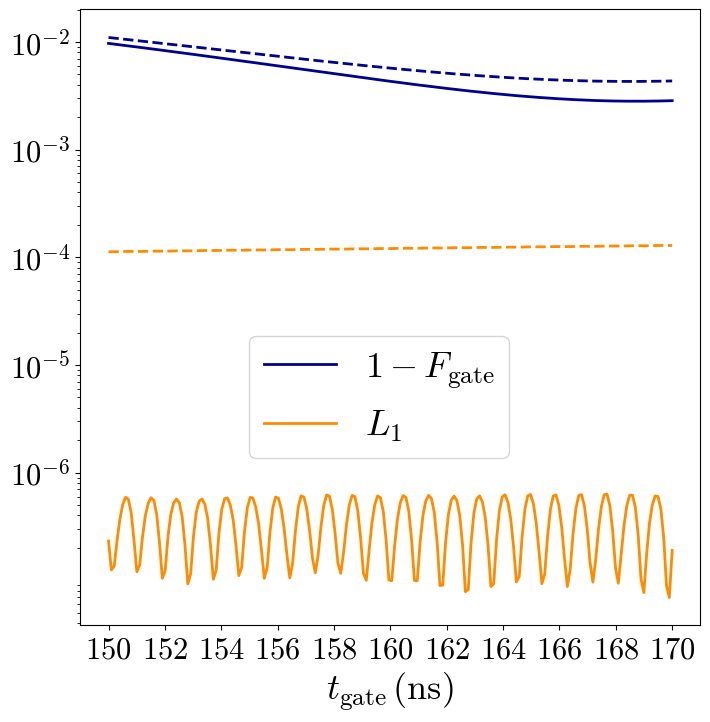

In [17]:
plot_cr_gate_time(result, p_set, save=True)

In [18]:
gate_time_list = []
infid_list = []
infid_list_noise = []
leak_list = []
for res in result:
    gate_time_list.append(res["gate_time"])
    infid_list.append(1 - res["gate_fid"])
    infid_list_noise.append(1 - res["gate_fid_noise"])
    leak_list.append(res["avg_leakage"])
max_fid = 1.0 - min(infid_list)
max_fid_noise = 1.0 - min(infid_list_noise)
print("Maximum gate fidelity = {}".format(max_fid))
print("Maximum gate fidelity noise = {}".format(max_fid_noise))

Maximum gate fidelity = 0.9971855772421334
Maximum gate fidelity noise = 0.9957039854417624


In [11]:
result[0]

{'gate_time': 150.0,
 'gate_fid': 0.9903079275776993,
 'avg_leakage': 2.3160544770917113e-07,
 'gate_fid_noise': 0.9890026874517636,
 'avg_leakage_noise': 0.00011244732730752993}